In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import numpy as np

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# A-Reviewing Data
1-Identify how data looks and know some information about it -if it has null values-
and know statistical charactersitics of each numeric feature.

In [ ]:
#Read csv first
df = pd.read_csv('train.csv')

In [ ]:
#Display first 5 rows of data
df.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [ ]:
#drop Id column as there is index column
df.drop(columns = 'Id' , inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [ ]:
#Display statistical characteristics of numeric features.
df.describe()

,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
#See if there is any null values and know features data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43152 non-null  float64
 1   cut      43152 non-null  object 
 2   color    43152 non-null  object 
 3   clarity  43152 non-null  object 
 4   depth    43152 non-null  float64
 5   table    43152 non-null  float64
 6   price    43152 non-null  int64  
 7   x        43152 non-null  float64
 8   y        43152 non-null  float64
 9   z        43152 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.3+ MB


Obviously categorical features -cut , color and clarity- have object data type and
No null values present.

Identify count values of categorical data.

In [ ]:
df['cut'].value_counts()

cut
Ideal        17203
Premium      11113
Very Good     9658
Good          3881
Fair          1297
Name: count, dtype: int64

In [ ]:
df['color'].value_counts()

color
G    9060
E    7832
F    7633
H    6651
D    5421
I    4265
J    2290
Name: count, dtype: int64

In [ ]:
df['clarity'].value_counts()

clarity
SI1     10428
VS2      9824
SI2      7432
VS1      6475
VVS2     4041
VVS1     2904
IF       1442
I1        606
Name: count, dtype: int64

# B- Data Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


<Axes: >

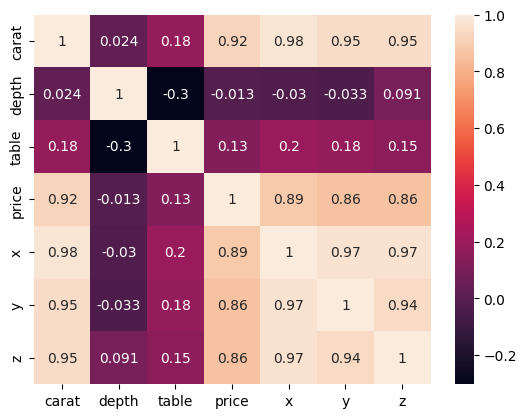

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True)


As we see carat is strongly correlated with x y z

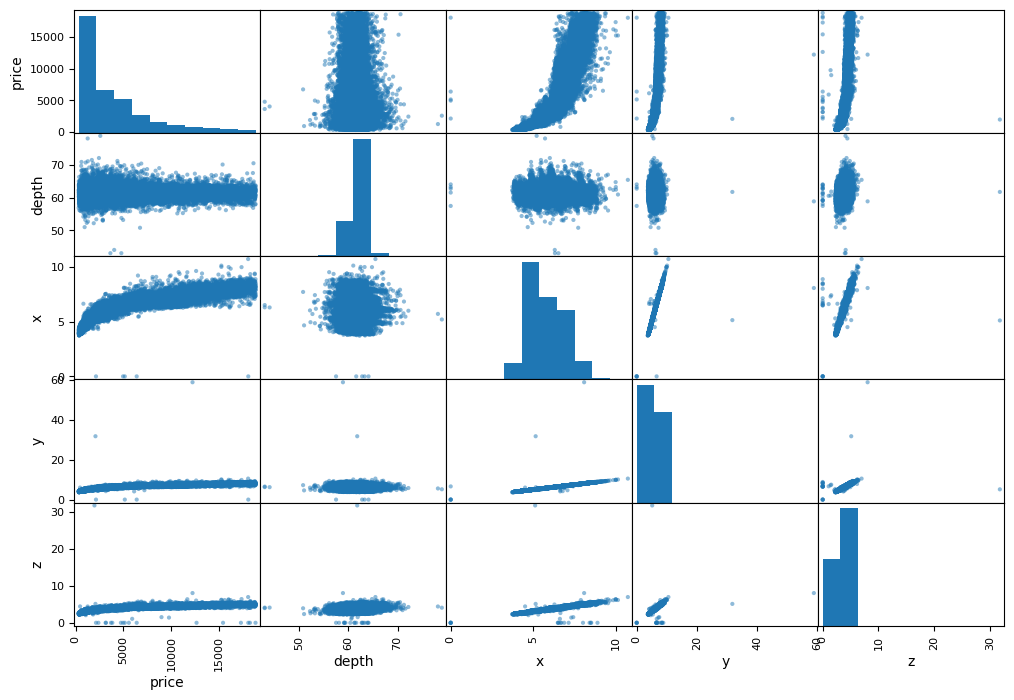

In [ ]:
#Scatter matrix visualize correlation between numeric features
#we did not include table as it is not highly correlated with other
#features seen in the heatmap
from pandas.plotting import scatter_matrix
attributes = ['price' , 'depth' , 'x' , 'y','z']
scatter_matrix(df[attributes] , figsize=(12,8))
plt.show()

In [ ]:
sns.pairplot(df, vars=attributes , hue='cut')

In [ ]:
sns.pairplot(df, vars=attributes , hue='color')

In [ ]:
sns.pairplot(df, vars=attributes , hue='clarity')

In [ ]:
# Create a scatter plot
fig = px.scatter(
    df,
    x="x",
    y="y",
    size="carat",
    color="cut",
    hover_data=["color", "clarity", "price"],
    title="Scatter plot of Diamond Data",
    labels={
        "x": "Width (x)",
        "y": "Length (y)",
        "carat": "Carat",
        "cut": "Cut",
    },
    # Change the color palette
    color_discrete_sequence=px.colors.qualitative.D3  # Use the D3 color palette
)

# Show the plot
fig.show()


It is noticable that as width of diamond increase the price rise significantly

# Feature Engineering

In [ ]:
# Introduce new feature - volume-
df['volume'] = df['x'] * df['y'] * df['z']
df.drop(df[df['volume'] == 0].index, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07,176.483340
1,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51,246.965796
2,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71,52.943373
3,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19,86.422842
4,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50,115.315200


In [ ]:
#Another feature -Mass-
# Density of diamond in g/cm^3
density_diamond = 3.51  # in g/cm^3

# Calculate the mass of the diamond using the existing volume column
df['mass'] = df['volume'] * density_diamond
df.drop(df[df['mass'] == 0].index, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,mass
0,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07,176.483340,619.456523
1,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51,246.965796,866.849944
2,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71,52.943373,185.831239
3,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19,86.422842,303.344175
4,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50,115.315200,404.756352


<Axes: >

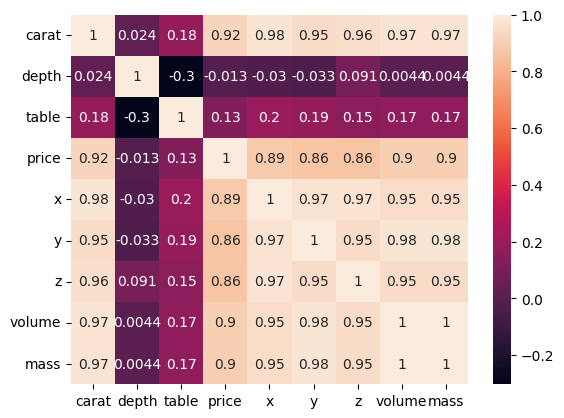

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [ ]:
df.drop(columns=['x','y','z'] , inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,volume,mass
0,1.06,Ideal,I,SI2,61.8,57.0,4270,176.483340,619.456523
1,1.51,Premium,G,VVS2,60.9,58.0,15164,246.965796,866.849944
2,0.32,Ideal,F,VS2,61.3,56.0,828,52.943373,185.831239
3,0.53,Ideal,G,VS2,61.2,56.0,1577,86.422842,303.344175
4,0.70,Premium,H,VVS2,61.0,57.0,2596,115.315200,404.756352


In [ ]:
# Create a scatter plot
fig = px.scatter(
    df,
    x="volume",
    y="mass",
    size="carat",
    color="cut",
    hover_data=["color", "clarity", "price"],
    title="Scatter plot of Diamond Data",
    labels={
        "volume": "Volume",
        "mass": "Mass",
        "carat": "Carat",
        "cut": "Cut",
    },
    # Change the color palette
    color_discrete_sequence=px.colors.qualitative.D3  # Use the D3 color palette
)
# Set the range of the volume axis
fig.update_layout(
    xaxis=dict(range=[0, 1000])  # Set the range of the volume axis from 0 to 1000
)
# Show the plot
fig.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43135 entries, 0 to 43151
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43135 non-null  float64
 1   cut      43135 non-null  object 
 2   color    43135 non-null  object 
 3   clarity  43135 non-null  object 
 4   depth    43135 non-null  float64
 5   table    43135 non-null  float64
 6   price    43135 non-null  int64  
 7   volume   43135 non-null  float64
 8   mass     43135 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 3.3+ MB


# Train Model

**Encoding Categorical data first with label encoding as priority matters**

In [ ]:
# Encoding categorical variables using LabelEncoder
label_encoder = LabelEncoder()
df['cut'] = label_encoder.fit_transform(df['cut'])
df['color'] = label_encoder.fit_transform(df['color'])
df['clarity'] = label_encoder.fit_transform(df['clarity'])
df.head()

,carat,cut,color,clarity,depth,table,price,volume,mass
0,1.06,2,5,3,61.8,57.0,4270,176.483340,619.456523
1,1.51,3,3,7,60.9,58.0,15164,246.965796,866.849944
2,0.32,2,2,5,61.3,56.0,828,52.943373,185.831239
3,0.53,2,3,5,61.2,56.0,1577,86.422842,303.344175
4,0.70,3,4,7,61.0,57.0,2596,115.315200,404.756352


In [ ]:
X_train = df.drop(columns=['price'])  # Drop the 'price' column from the features
y_train = df['price']



In [ ]:
# Train the XGBoost model
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Calculate RMSE
pred1= model.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train,pred1))
print("RMSE:", rmse)

RMSE: 414.70402628536317


# Preprocessing test_data

In [ ]:
test_data= pd.read_csv('test.csv')
test_data.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10788 entries, 0 to 10787
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       10788 non-null  int64  
 1   carat    10788 non-null  float64
 2   cut      10788 non-null  object 
 3   color    10788 non-null  object 
 4   clarity  10788 non-null  object 
 5   depth    10788 non-null  float64
 6   table    10788 non-null  float64
 7   x        10788 non-null  float64
 8   y        10788 non-null  float64
 9   z        10788 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 842.9+ KB


In [ ]:
test_data['volume'] = test_data['x'] * test_data['y'] * test_data['z']
test_data.loc[test_data['volume'] == 0, 'price'] = 0
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10788 entries, 0 to 10787
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       10788 non-null  int64  
 1   carat    10788 non-null  float64
 2   cut      10788 non-null  object 
 3   color    10788 non-null  object 
 4   clarity  10788 non-null  object 
 5   depth    10788 non-null  float64
 6   table    10788 non-null  float64
 7   x        10788 non-null  float64
 8   y        10788 non-null  float64
 9   z        10788 non-null  float64
 10  volume   10788 non-null  float64
 11  price    3 non-null      float64
dtypes: float64(8), int64(1), object(3)
memory usage: 1011.5+ KB


In [ ]:
density_diamond = 3.51  # in g/cm^3

# Calculate the mass of the diamond using the existing volume column
test_data['mass'] = test_data['volume'] * density_diamond
test_data.loc[test_data['mass'] == 0, 'price'] = 0
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10788 entries, 0 to 10787
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       10788 non-null  int64  
 1   carat    10788 non-null  float64
 2   cut      10788 non-null  object 
 3   color    10788 non-null  object 
 4   clarity  10788 non-null  object 
 5   depth    10788 non-null  float64
 6   table    10788 non-null  float64
 7   x        10788 non-null  float64
 8   y        10788 non-null  float64
 9   z        10788 non-null  float64
 10  volume   10788 non-null  float64
 11  price    3 non-null      float64
 12  mass     10788 non-null  float64
dtypes: float64(9), int64(1), object(3)
memory usage: 1.1+ MB


In [ ]:
test_data.drop(columns=['x','y','z'] , inplace=True)
test_data.head()

,Id,carat,cut,color,clarity,depth,table,volume,price,mass
0,1,0.34,Ideal,G,VVS2,61.1,57.0,55.686400,NaN,195.459264
1,2,0.71,Premium,E,VS2,62.7,58.0,116.719456,NaN,409.685291
2,3,0.44,Very Good,I,VS1,62.8,56.0,71.889720,NaN,252.332917
3,4,0.81,Premium,E,SI2,60.1,59.0,134.037855,NaN,470.472871
4,5,0.40,Ideal,G,VVS1,61.2,56.0,66.435840,NaN,233.189798


In [ ]:
test_data.drop(columns = 'Id' , inplace=True)
test_data.head()

,carat,cut,color,clarity,depth,table,volume,price,mass
0,0.34,Ideal,G,VVS2,61.1,57.0,55.686400,NaN,195.459264
1,0.71,Premium,E,VS2,62.7,58.0,116.719456,NaN,409.685291
2,0.44,Very Good,I,VS1,62.8,56.0,71.889720,NaN,252.332917
3,0.81,Premium,E,SI2,60.1,59.0,134.037855,NaN,470.472871
4,0.40,Ideal,G,VVS1,61.2,56.0,66.435840,NaN,233.189798


In [ ]:
test_data['cut'] = label_encoder.fit_transform(test_data['cut'])
test_data['color'] = label_encoder.fit_transform(test_data['color'])
test_data['clarity'] = label_encoder.fit_transform(test_data['clarity'])

In [ ]:
test_data=test_data.fillna(df.mean())

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10788 entries, 0 to 10787
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    10788 non-null  float64
 1   cut      10788 non-null  int64  
 2   color    10788 non-null  int64  
 3   clarity  10788 non-null  int64  
 4   depth    10788 non-null  float64
 5   table    10788 non-null  float64
 6   volume   10788 non-null  float64
 7   price    10788 non-null  float64
 8   mass     10788 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 758.7 KB


In [ ]:
test_data.drop(columns = 'price' , inplace=True)
test_data.head()

,carat,cut,color,clarity,depth,table,volume,mass
0,0.34,2,3,7,61.1,57.0,55.686400,195.459264
1,0.71,3,1,5,62.7,58.0,116.719456,409.685291
2,0.44,4,5,4,62.8,56.0,71.889720,252.332917
3,0.81,3,1,3,60.1,59.0,134.037855,470.472871
4,0.40,2,3,6,61.2,56.0,66.435840,233.189798


In [ ]:
# Make predictions on the test set
y_pred = model.predict(test_data)

# Fine-Tunning Model

In [ ]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

In [ ]:
# Create an XGBoost regressor model
xgb_model = xgb.XGBRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

In [ ]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

In [ ]:
# Get the best estimator
best_estimator = grid_search.best_estimator_

In [ ]:
# Calculate RMSE
pred2= best_estimator.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train,pred2))
print("RMSE:", rmse)
pred2

RMSE: 439.13334561538534


array([ 4168.576  , 14946.262  ,   739.478  , ...,  1003.51526,
         801.35254,   689.3361 ], dtype=float32)

## Download submission file (price,id)

In [ ]:
# Make predictions on the test set
price_pred = model.predict(test_data)


In [ ]:
# Generate a sequence of IDs starting from 1
ids = range(1, len(price_pred) + 1)
# Create a DataFrame for submission
submission = pd.DataFrame({'Id': ids, 'price': price_pred})


In [ ]:
submission.to_csv('submission.csv', index=False)

In [ ]:
from google.colab import files
# Assuming submission.csv is the file you want to download
files.download('submission.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>